In [2]:
import pandas as pd
import numpy as np


In [4]:
# Dada una secuencia de Entrada
data= pd.read_excel('USDJPY_M5_201901020000_201908052010.xlsx')

In [141]:
df=data[['<CLOSE>']]
df.head()

,<CLOSE>
0,109649
1,109648
2,109620
3,109617
4,109643


In [131]:
from matplotlib import pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns

In [142]:
dfc=np.diff(df,axis=0)


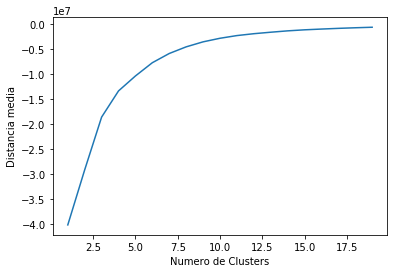

In [143]:
CC = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in CC]
score = [kmeans[i].fit(dfc).score(dfc) for i in range(len(kmeans))]
plt.plot(CC,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distancia media')
plt.show()

In [144]:
kmeans = KMeans(n_clusters=10).fit(dfc)
centroids = kmeans.cluster_centers_
print(centroids)

[[    3.75182386]
 [  -29.99486125]
 [-3318.        ]
 [  170.        ]
 [ 1757.        ]
 [  -73.23536585]
 [   51.40252608]
 [   -9.6128016 ]
 [ -280.60869565]
 [   19.84344516]]


In [162]:
tipo=[]
for i in range(0,len(centroids)):
    tipo.append(centroids[i][0])
tipo

[3.7518238580342262,
 -29.994861253851628,
 -3318.0,
 169.9999999999999,
 1757.0,
 -73.23536585365923,
 51.402526084569864,
 -9.612801598276864,
 -280.60869565217405,
 19.843445158223084]

In [166]:
tipo=np.sort(tipo)

<BarContainer object of 10 artists>

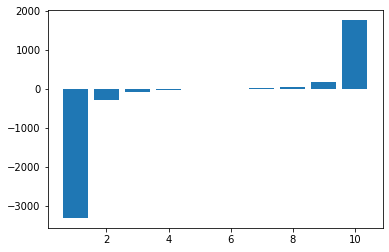

In [170]:
plt.bar([1,2,3,4,5,6,7,8,9,10],tipo)

In [171]:
#Visualización de los clusters
df=pd.DataFrame(dfc,columns=['<CLOSE>','<TICKVOL>'])
labels = kmeans.labels_
C = kmeans.cluster_centers_
cluster= ['blue','grey','red','black','green','yellow','magenta','cyan','C0','C1' ]
asignar=[]
for row in labels:
    asignar.append(cluster[row])
df['color']=asignar
plt.scatter( df['<CLOSE>'],df['<TICKVOL>'], marker='h', c=asignar, s=10)
#plt.scatter(C[:, 1], C[:, 0], marker='*', c=colores, s=1000)# no se notan mucho de todos modos.
plt.ylim(-200, 200)
plt.xlim(-2000, 2000)
plt.xlabel('TICKVOL')
plt.ylabel('Close')
plt.show()

ValueError: Shape of passed values is (44272, 1), indices imply (44272, 2)

In [97]:
X = preprocessing.normalize(np.array(df), axis= 0)   
X = StandardScaler().fit_transform(X)
np.shape(X)

(44272, 5)

In [84]:
df.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>
0,-15,-12,-1,-1,-5
1,0,-2,-31,-28,364
2,-30,20,-5,-3,-254
3,-3,-25,-6,26,-71
4,26,15,31,8,576
